# Loading and Visualization

In this section, we illustrate how to load and visualize the pseudoPAGES2k dataset with `cfr`.

Required data to complete this tutorial:

- pseudoPAGES2k: [ppwn_SNRinf_rta.nc](https://github.com/fzhu2e/paper-pseudoPAGES2k/raw/main/data/ppwn_SNRinf_rta.nc)

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)
import xarray as xr

2023.6.28


## Load the pseudoPAGES2k dataset with `xarray`

By default, we may load a netCDF file with `xarray` to have a check of the data structure:

In [2]:
ds = xr.open_dataset('./data/ppwn_SNRinf_rta.nc', use_cftime=True)
ds

<xarray.Dataset>
Dimensions:  (time: 1156)
Coordinates:
  * time     (time) object 0850-01-01 00:00:00 ... 2005-01-01 00:00:00
Data variables: (12/558)
    NAm_153  (time) float64 ...
    NAm_165  (time) float64 ...
    Asi_178  (time) float64 ...
    Asi_174  (time) float64 ...
    Asi_198  (time) float64 ...
    NAm_145  (time) float64 ...
    ...       ...
    Ocn_169  (time) float64 ...
    Asi_201  (time) float64 ...
    Asi_179  (time) float64 ...
    Arc_014  (time) float64 ...
    Ocn_071  (time) float64 ...
    Ocn_072  (time) float64 ...

In [3]:
ds['NAm_001']

<xarray.DataArray 'NAm_001' (time: 1156)>
[1156 values with dtype=float64]
Coordinates:
  * time     (time) object 0850-01-01 00:00:00 ... 2005-01-01 00:00:00
Attributes:
    lat:         35.3
    lon:         248.6
    elev:        nan
    ptype:       tree.TRW
    dt:          1.0
    time_name:   Time
    time_unit:   yr
    value_name:  trsgi
    value_unit:  NA

We see that this netCDF file has multiple data variables named after **proxy IDs**.
Each variable comes with the below fundamental attributes:

- lat: the latitude of the site
- lon: the longitude of the site
- ptype: the proxy type
- dt: step of the time axis, i.e., temporal resolution
- time_name: name of the time axis
- time_unit: unit of the time axis
- value_name: unit of the value axis
- value_unit: unit of the value axis

With this certain format, the netCDF file is `cfr` ready.

## Load the pseudoPAEGS2k dataset with `cfr`

The `cfr.ProxyDatabase` class comes with a `.load_nc()` method that can help us load a proxy database from a netCDF file following the certain format shown above:

In [6]:
# load the pseudoPAGES2k database from a netCDF file

# load from a local copy
# pdb = cfr.ProxyDatabase().load_nc('./data/ppwn_SNRinf_rta.nc')

# load from the cloud
pdb = cfr.ProxyDatabase().fetch('pseudoPAGES2k/ppwn_SNRinf_rta')

## Visualize the pseudoPAGES2k dataset

Once the netCDF file is loaded as a `cfr.ProxyDatabase`, we can easily visualize the dataset with the `.plot()` method:

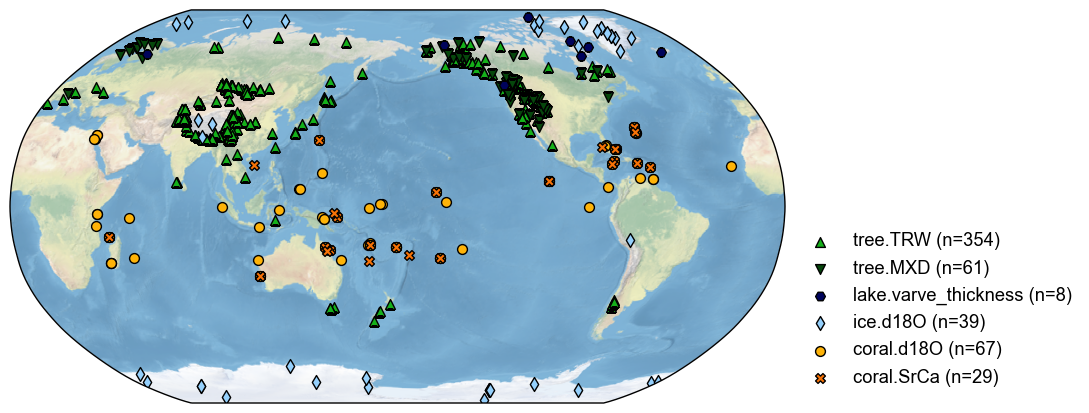

In [7]:
fig, ax = pdb.plot()

We may also plot map along with the count of the records:

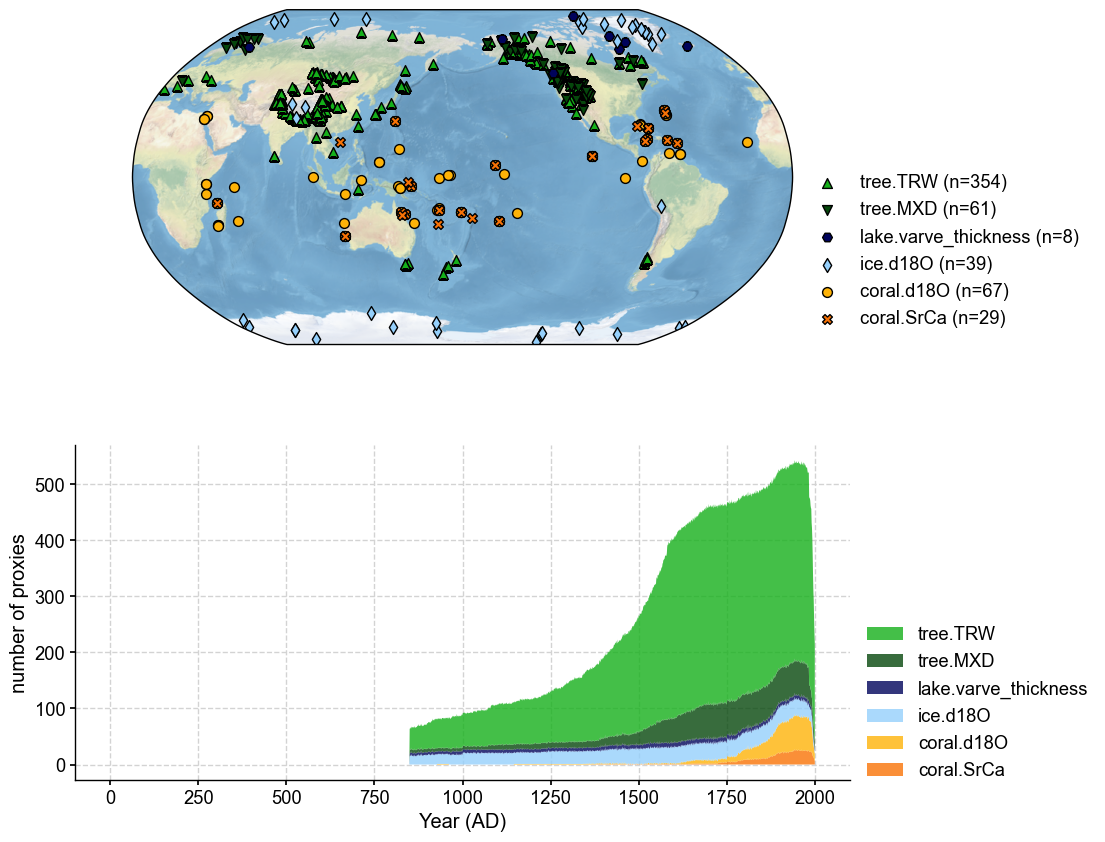

In [8]:
fig, ax = pdb.plot(plot_count=True)

Since the dataset starts from 850 AD, we may adjust the x-axis utilizing the `matplotlib` methods:

(800.0, 2000.0)

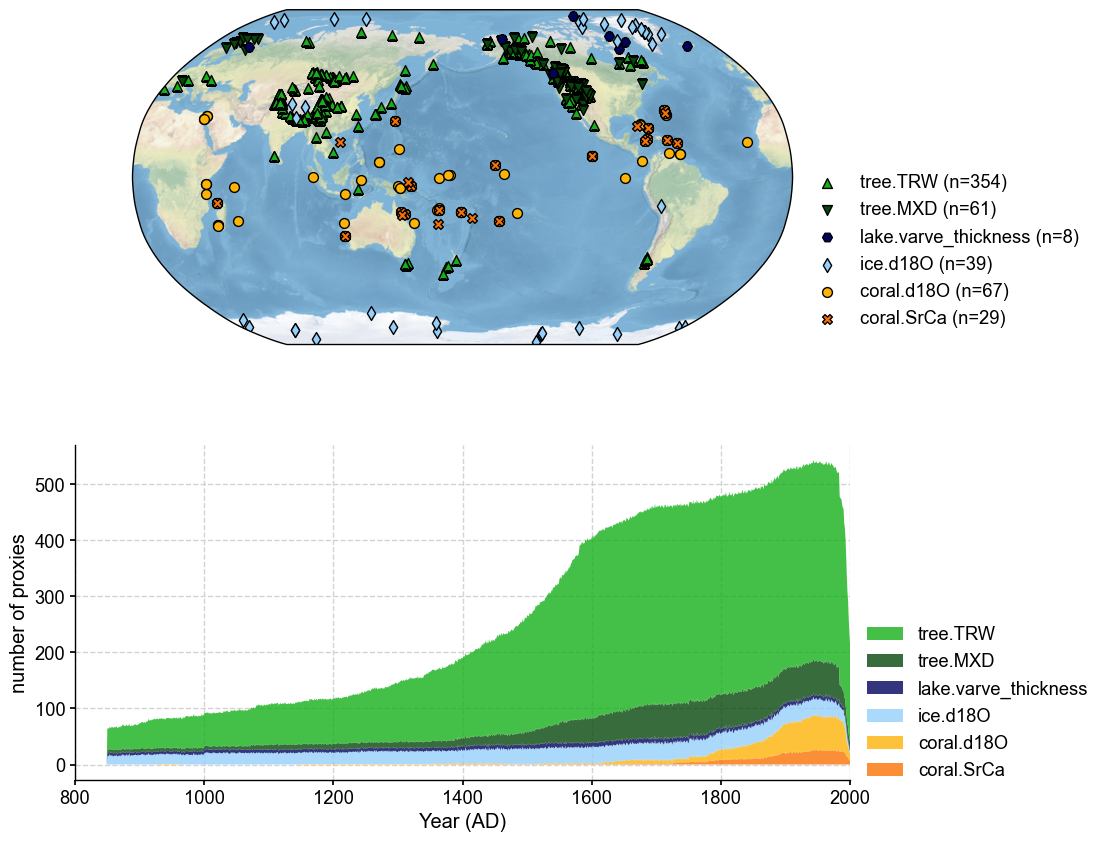

In [9]:
fig, ax = pdb.plot(plot_count=True)
ax['count'].set_xlim(800, 2000)

## Access and visualize a specific record

A specific record can be accessed by its **proxy ID**:

In [10]:
pobj = pdb['NAm_001']
pobj

This returned object is defined by `cfr.ProxyRecord`, which comes with several attributes such as:
- time: the time axis
- value: the value axis
- lat: the latitude of the site
- lon: the longitude of the site
- (... other metadata)

For instance, to access the record series:

In [11]:
print('time axis:', pobj.time)
print('value axis:', pobj.value)

time axis: [ 850.  851.  852. ... 2000. 2001. 2002.]
value axis: [1.06636798 0.86741749 0.87185387 ... 0.81825943 0.58718452 0.85097093]


Now that we have the `cfr.ProxyRecord` object, we can easily visualize the record utilizing the `.plot()` method:

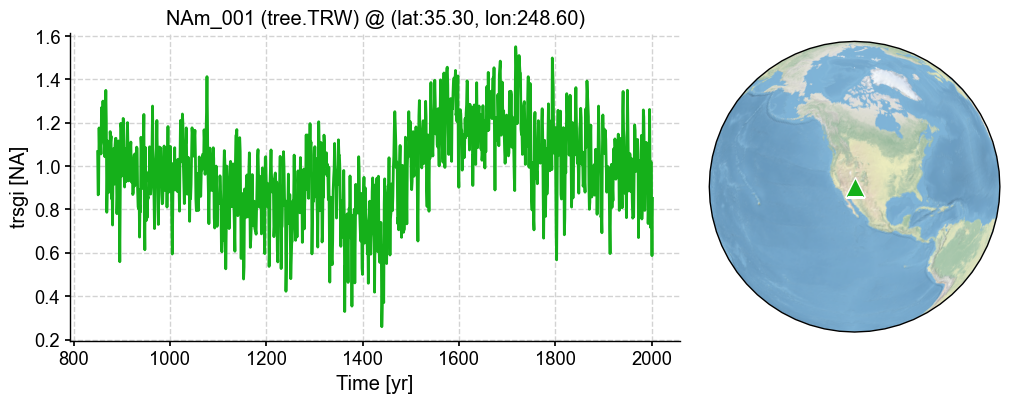

In [12]:
fig, ax = pobj.plot()

We may **slice the record** to zoom in and out.
For instance, let us check the instrumental period:

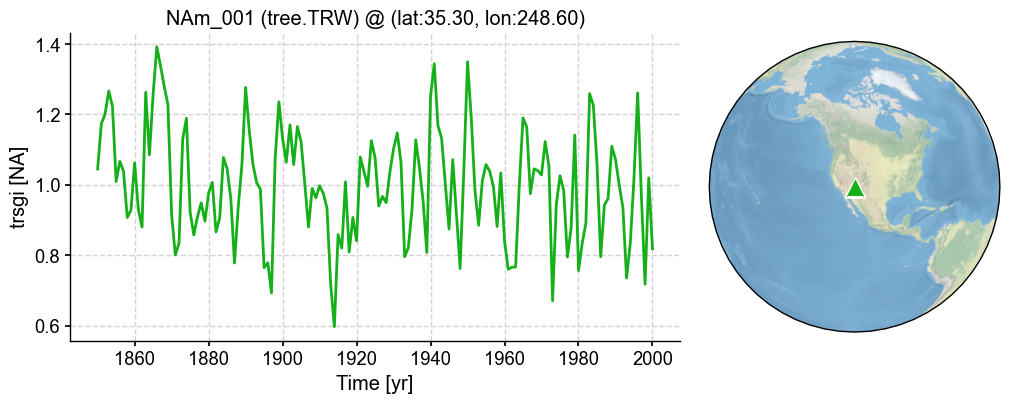

In [13]:
fig, ax = pobj.slice([1850, 2000]).plot()

We may also slice with a shortcut using strings of years:

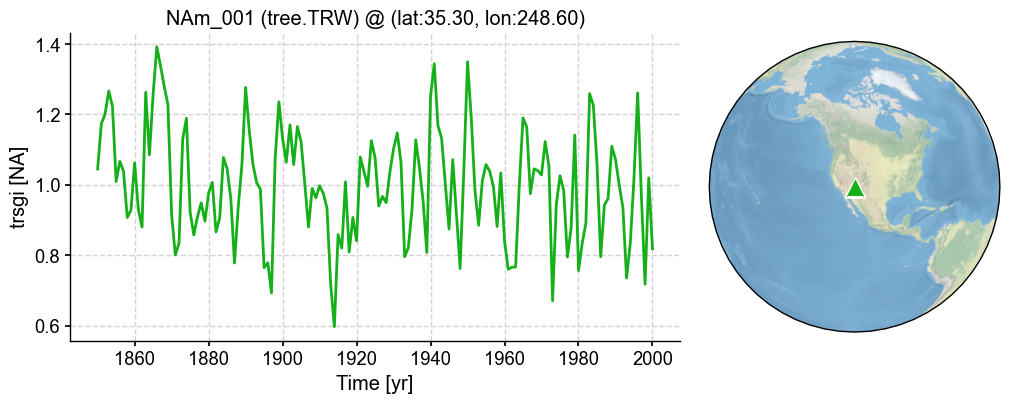

In [14]:
fig, ax = pobj['1850':'2000'].plot()

This shortcut also supports time step.
For instance, to display the data points every 10 years between 1850 AD and 2000 AD:

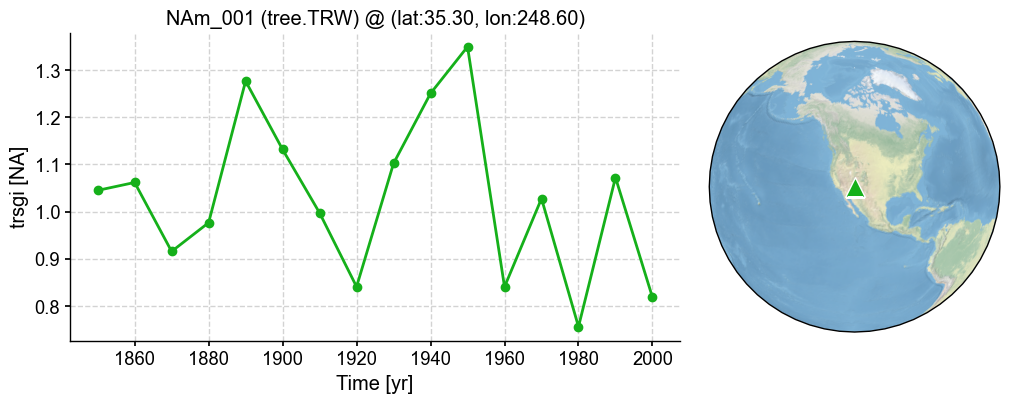

In [15]:
fig, ax = pobj['1850':'2000':'10'].plot(marker='o')

## Check the **proxy IDs** on an interactive map

One may ask "How do I know the proxy IDs?"

A `cfr.ProxyDatabase` object also comes with a `.plotly()` method that can help us check **proxy IDs** on an interactive map.
It will display an interactive map, and by hovering the mouse over each site marker, one may check the metadata of a specific site, including:

- pid (proxy ID)
- ptype
- lat
- lon

In [16]:
pdb.plotly()

In [17]:
pdb.plotly_count()